# Using glob to load many files

In [1]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import glob

In [2]:
# Recursive query - extra /**/ added to string
q = "Data/**/final_tmdb_data*.csv" 
chunked_files = sorted(glob.glob(q, recursive=True))
chunked_files

['Data/final_tmdb_data_2000.csv',
 'Data/final_tmdb_data_2001.csv',
 'Data/final_tmdb_data_2002.csv',
 'Data/final_tmdb_data_2003.csv',
 'Data/final_tmdb_data_2004.csv',
 'Data/final_tmdb_data_2005.csv',
 'Data/final_tmdb_data_2006.csv',
 'Data/final_tmdb_data_2007.csv',
 'Data/final_tmdb_data_2008.csv',
 'Data/final_tmdb_data_2009.csv',
 'Data/final_tmdb_data_2010.csv',
 'Data/final_tmdb_data_2011.csv',
 'Data/final_tmdb_data_2012.csv',
 'Data/final_tmdb_data_2013.csv',
 'Data/final_tmdb_data_2014.csv',
 'Data/final_tmdb_data_2015.csv',
 'Data/final_tmdb_data_2016.csv',
 'Data/final_tmdb_data_2017.csv',
 'Data/final_tmdb_data_2018.csv',
 'Data/final_tmdb_data_2019.csv',
 'Data/final_tmdb_data_2020.csv',
 'Data/final_tmdb_data_2021.csv']

In [3]:
## Loading and Concatenating the list of dfs
df_combined = pd.concat([pd.read_csv(file,lineterminator='\n') for file in chunked_files])
df_combined

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1868.0,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3528,tt9895024,0.0,/S1kutYyoyuBJKGS0mXxv2fZNbr.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,834443.0,de,Heikos Welt,...,0.0,118.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,NaN,Heiko's World,0.0,0.0,0.0,NaN
3529,tt9896876,0.0,/hMvRbT6HOqERhh3K8kXbaLz9LlZ.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,821493.0,en,India Sweets and Spices,...,0.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Let the aunties talk.,India Sweets and Spices,0.0,6.0,2.0,PG-13
3530,tt9898844,0.0,/q2KFBGyUSzHDhNqXEYv2LqTWVSz.jpg,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,870671.0,en,The Hunting,...,0.0,91.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Hunger runs deep.,The Hunting,0.0,4.9,20.0,NaN
3531,tt9900940,0.0,/3jjWLg5bevWqReyVroYqxwVrH0k.jpg,NaN,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,861294.0,en,The Scrapper,...,0.0,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,You can't escape your past.,The Scrapper,0.0,6.0,2.0,NaN


In [4]:
# remove ids that are 0
df_combined = df_combined.loc[ df_combined['imdb_id']!='0']
df_combined

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1868.0,PG
5,tt0118852,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,...,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.9,46.0,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3528,tt9895024,0.0,/S1kutYyoyuBJKGS0mXxv2fZNbr.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,834443.0,de,Heikos Welt,...,0.0,118.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,NaN,Heiko's World,0.0,0.0,0.0,NaN
3529,tt9896876,0.0,/hMvRbT6HOqERhh3K8kXbaLz9LlZ.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,821493.0,en,India Sweets and Spices,...,0.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Let the aunties talk.,India Sweets and Spices,0.0,6.0,2.0,PG-13
3530,tt9898844,0.0,/q2KFBGyUSzHDhNqXEYv2LqTWVSz.jpg,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,870671.0,en,The Hunting,...,0.0,91.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Hunger runs deep.,The Hunting,0.0,4.9,20.0,NaN
3531,tt9900940,0.0,/3jjWLg5bevWqReyVroYqxwVrH0k.jpg,NaN,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,861294.0,en,The Scrapper,...,0.0,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,You can't escape your past.,The Scrapper,0.0,6.0,2.0,NaN


In [5]:
df_combined = df_combined.reset_index(drop=True)
df_combined

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,NaN
1,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,NaN
2,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
3,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1868.0,PG
4,tt0118852,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,...,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.9,46.0,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60125,tt9895024,0.0,/S1kutYyoyuBJKGS0mXxv2fZNbr.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,834443.0,de,Heikos Welt,...,0.0,118.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,NaN,Heiko's World,0.0,0.0,0.0,NaN
60126,tt9896876,0.0,/hMvRbT6HOqERhh3K8kXbaLz9LlZ.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,821493.0,en,India Sweets and Spices,...,0.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Let the aunties talk.,India Sweets and Spices,0.0,6.0,2.0,PG-13
60127,tt9898844,0.0,/q2KFBGyUSzHDhNqXEYv2LqTWVSz.jpg,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,870671.0,en,The Hunting,...,0.0,91.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Hunger runs deep.,The Hunting,0.0,4.9,20.0,NaN
60128,tt9900940,0.0,/3jjWLg5bevWqReyVroYqxwVrH0k.jpg,NaN,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,861294.0,en,The Scrapper,...,0.0,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,You can't escape your past.,The Scrapper,0.0,6.0,2.0,NaN


In [6]:
## Saving the final combined dataframe
final_fname ='Data/final_tmdb_data_combined.csv.gz'
df_combined.to_csv(final_fname, compression='gzip', index=False)

In [7]:
df_combined = pd.read_csv(final_fname,lineterminator='\n')
df_combined

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,NaN
1,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,NaN
2,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
3,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1868.0,PG
4,tt0118852,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,...,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.9,46.0,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60125,tt9895024,0.0,/S1kutYyoyuBJKGS0mXxv2fZNbr.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,834443.0,de,Heikos Welt,...,0.0,118.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,NaN,Heiko's World,0.0,0.0,0.0,NaN
60126,tt9896876,0.0,/hMvRbT6HOqERhh3K8kXbaLz9LlZ.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,821493.0,en,India Sweets and Spices,...,0.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Let the aunties talk.,India Sweets and Spices,0.0,6.0,2.0,PG-13
60127,tt9898844,0.0,/q2KFBGyUSzHDhNqXEYv2LqTWVSz.jpg,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,870671.0,en,The Hunting,...,0.0,91.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Hunger runs deep.,The Hunting,0.0,4.9,20.0,NaN
60128,tt9900940,0.0,/3jjWLg5bevWqReyVroYqxwVrH0k.jpg,NaN,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,861294.0,en,The Scrapper,...,0.0,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,You can't escape your past.,The Scrapper,0.0,6.0,2.0,NaN


In [8]:
df = df_combined
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,NaN
1,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,NaN
2,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
3,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1868.0,PG
4,tt0118852,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,...,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.9,46.0,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60125,tt9895024,0.0,/S1kutYyoyuBJKGS0mXxv2fZNbr.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,834443.0,de,Heikos Welt,...,0.0,118.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,NaN,Heiko's World,0.0,0.0,0.0,NaN
60126,tt9896876,0.0,/hMvRbT6HOqERhh3K8kXbaLz9LlZ.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,821493.0,en,India Sweets and Spices,...,0.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Let the aunties talk.,India Sweets and Spices,0.0,6.0,2.0,PG-13
60127,tt9898844,0.0,/q2KFBGyUSzHDhNqXEYv2LqTWVSz.jpg,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,870671.0,en,The Hunting,...,0.0,91.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Hunger runs deep.,The Hunting,0.0,4.9,20.0,NaN
60128,tt9900940,0.0,/3jjWLg5bevWqReyVroYqxwVrH0k.jpg,NaN,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,861294.0,en,The Scrapper,...,0.0,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,You can't escape your past.,The Scrapper,0.0,6.0,2.0,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60130 entries, 0 to 60129
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                60130 non-null  object 
 1   adult                  60130 non-null  float64
 2   backdrop_path          36994 non-null  object 
 3   belongs_to_collection  3738 non-null   object 
 4   budget                 60130 non-null  float64
 5   genres                 60130 non-null  object 
 6   homepage               14776 non-null  object 
 7   id                     60130 non-null  float64
 8   original_language      60130 non-null  object 
 9   original_title         60130 non-null  object 
 10  overview               58761 non-null  object 
 11  popularity             60130 non-null  float64
 12  poster_path            54382 non-null  object 
 13  production_companies   60130 non-null  object 
 14  production_countries   60130 non-null  object 
 15  re

## Does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?
- Is there a significant difference between ratings?
- If so, what was the p-value of our analysis?
- Which rating earns the most revenue?
- We prepare a visualization that supports our finding.

In [10]:
## Checking Certification values
df['certification'].value_counts(dropna=False)

NaN                                45506
R                                   6097
NR                                  3261
PG-13                               3224
PG                                  1432
G                                    442
NC-17                                156
Unrated                                5
-                                      1
UR                                     1
Not Rated                              1
ScreamFest Horror Film Festival        1
R                                      1
PG-13                                  1
10                                     1
Name: certification, dtype: int64

In [11]:
# fix extra space certs
df['certification'] = df['certification'].str.strip()

In [12]:
## fix certification col
repl_cert = {'UR':'NR',
             'Not Rated':'NR',
             'Unrated':'NR',
             '-':'NR',
             '10':np.nan,
             'ScreamFest Horror Film Festival':'NR'}
df['certification'] = df['certification'].replace(repl_cert)
df['certification'].value_counts(dropna=False)

NaN      45507
R         6098
NR        3270
PG-13     3225
PG        1432
G          442
NC-17      156
Name: certification, dtype: int64

In [13]:
df['certification'].fillna('Missing',inplace=True)

In [56]:
df['certification'].value_counts(dropna=False)

Missing    45507
R           6098
NR          3270
PG-13       3225
PG          1432
G            442
NC-17        156
Name: certification, dtype: int64

- Null hypothesis: There is no significant statistical difference between the revenue generated by movies with different MPAA ratings.

- Alternate hypothesis: There is a significant statistical difference between the revenue generated by movies with different MPAA ratings..

Since we are comparing numerical data between more than 2 groups, we are going to use an ANOVA test.

In [15]:
## Create groups dictionary.
groups = {}
## Loop through all unique categories
for region in df['certification'].unique():
    ## Get series for group and rename
    data = df.loc[df['certification']==region,'revenue'].copy()
    
    # save into the dictionary
    groups[region] = data
groups.keys()

dict_keys(['Missing', 'PG', 'R', 'G', 'NR', 'PG-13', 'NC-17'])

In [16]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for certification, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[certification] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
Missing,45507.0,0.000000e+00,132270.787105,True
PG,1432.0,2.411489e-270,1241.635462,True
R,6098.0,0.000000e+00,7617.064476,True
G,442.0,1.470598e-112,515.007723,True
NR,3270.0,0.000000e+00,7107.742581,True
PG-13,3225.0,0.000000e+00,3525.252873,True
NC-17,156.0,3.349859e-59,269.287204,True


Since our p-values are all (significantly) less than alpha (0.05), we don't have any normal distributions. However, our groups sizes are sufficiently large enough that we can ignore the normality assumption.

In [17]:
# with the * operator 
stats.levene(*groups.values())

LeveneResult(statistic=1081.4025009092, pvalue=0.0)

Since we failed the test assumption of equal variance, we use the nonparametric Kruskal-Wallis test.

In [18]:
result = stats.kruskal('Missing', 'PG', 'R', 'G', 'NR', 'PG-13', 'NC-17')
result

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/scipy/stats/_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


KruskalResult(statistic=6.0, pvalue=0.42319008112684364)

We fail to reject the null hypothesis and find there is no significant statistical difference between the revenue generated by movies with different MPAA ratings.

/var/folders/50/3xbvh4ss3131ch53yqb8sydr0000gn/T/ipykernel_8930/3232230206.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(ylabels)


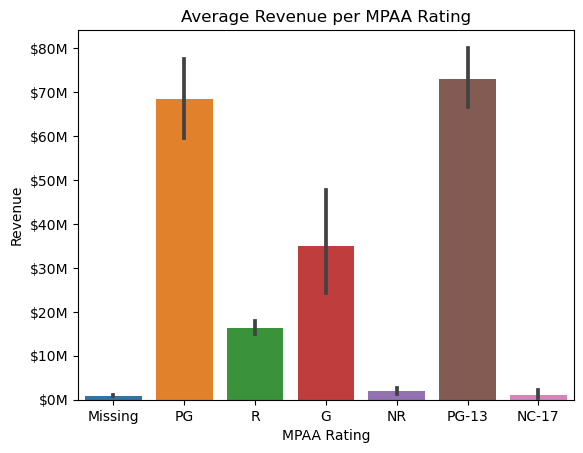

In [19]:
g=sns.barplot(data=df, y='revenue', x='certification')
plt.title('Average Revenue per MPAA Rating')
plt.ylabel('Revenue')
plt.xlabel('MPAA Rating')
plt.ticklabel_format(style='plain',axis='y')
ylabels = ['$' + '{:,.0f}'.format(y) + 'M' for y in g.get_yticks()/1000000]
g.set_yticklabels(ylabels)
plt.show()

In [20]:
df.groupby('certification')['revenue'].mean().sort_values(ascending=False)

certification
PG-13      7.301722e+07
PG         6.846710e+07
G          3.495188e+07
R          1.629736e+07
NR         1.876424e+06
NC-17      1.169921e+06
Missing    9.327284e+05
Name: revenue, dtype: float64

The rating which earns the most revenue on average is PG-13 with $73,017,220.

In [54]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## save the values as revenue and the labels to the MPAA rating
values = df['revenue']
labels = df['certification']

In [55]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
G,Missing,-34019150.9286,0.0,-42229066.2626,-25809235.5946,True
G,NC-17,-33781958.4072,0.0,-49778571.5533,-17785345.2611,True
G,NR,-33075455.3413,0.0,-41780477.0159,-24370433.6666,True
G,PG,33515217.803,0.0,24168631.2159,42861804.3902,True
G,PG-13,38065338.2824,0.0,29353087.9664,46777588.5983,True
G,R,-18654517.4529,0.0,-27115774.9811,-10193259.9247,True
Missing,NC-17,237192.5214,1.0,-13539079.2637,14013464.3065,False
Missing,NR,943695.5874,0.9735,-2166197.4181,4053588.5928,False
Missing,PG,67534368.7316,0.0,62924302.2483,72144435.215,True
Missing,PG-13,72084489.211,0.0,68954419.2889,75214559.1332,True


## Do movies that are over 2.5 hours long earn more revenue than movies that are 1.5 hours long (or less)?

## Do movies released in 2020 earn less revenue than movies released in 2018?

In [21]:
## Checking Release Date values
df['release_date'].value_counts(dropna=False)

NaN           1052
2009-01-01     265
2010-01-01     244
2008-01-01     232
2011-01-01     209
              ... 
2003-04-05       1
2003-03-19       1
2003-12-16       1
2003-06-09       1
2022-08-31       1
Name: release_date, Length: 7634, dtype: int64

In [23]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = df['release_date'].dt.year
df['year'].value_counts(dropna=False)

2019.0    4593
2018.0    4392
2017.0    4181
2016.0    3722
2021.0    3656
2020.0    3655
2015.0    3625
2014.0    3588
2013.0    3432
2012.0    3125
2011.0    2834
2010.0    2418
2009.0    2262
2008.0    2025
2007.0    1823
2006.0    1725
2005.0    1538
2004.0    1391
2001.0    1239
2003.0    1238
2002.0    1214
2000.0    1109
NaN       1052
2022.0     247
1999.0      23
1995.0       5
1998.0       4
1997.0       4
1996.0       2
1990.0       2
1973.0       1
1988.0       1
1977.0       1
1984.0       1
1994.0       1
1987.0       1
Name: year, dtype: int64

Since we are comparing numerical data between 2 groups, we will use a 2 Sample T-test.

Null Hypothesis: There is no significant statistical difference between the revenue earned by movie released in 2018 and 2020.

Alternate Hypothesis: Movies released in 2020 statistically earn significantly less revenue than movies released in 2018.

In [25]:
# Filtering out 2018 and 2020 movies
df18 = df.loc[df['year']== 2018].copy()
df20 = df.loc[df['year']== 2020].copy()

In [26]:
rev18 = df18['revenue']
rev20 = df20['revenue']

In [27]:
# Check for outliers in revenue for 2018 movies
zscores= stats.zscore(rev18)
outliers = abs(zscores)>3
np.sum(outliers)

39

In [28]:
len(rev18)

4392

In [30]:
# remove outliers from 2018 movies
rev18 = rev18[(np.abs(stats.zscore(rev18)) <= 3)]

In [31]:
# Confirm the 39 outliers were removed
len(rev18)

4353

In [32]:
# Check for outliers in revenue for 2020 movies
zscores= stats.zscore(rev20)
outliers = abs(zscores)>3
np.sum(outliers)

16

In [33]:
len(rev20)

3655

In [35]:
# remove outliers from 2020 movies
rev20 = rev20[(np.abs(stats.zscore(rev20)) <= 3)]

In [36]:
# Confirm the 16 outliers were removed
len(rev20)

3639

In [37]:
# test 2018 movies for normality
result_rev18 = stats.normaltest(rev18)
result_rev18

NormaltestResult(statistic=6241.777409791572, pvalue=0.0)

In [38]:
# test 2020 movies for normality
result_rev20 = stats.normaltest(rev20)
result_rev20

NormaltestResult(statistic=5903.743599241188, pvalue=0.0)

Both p-values are well below the significance level alpha 0.05, which means our data are NOT normally distributed. However, our group sizes are large enough (greater than 15) to proceed without satisfying this assumption.

In [39]:
# Test for equal variance
result = stats.levene(rev18,rev20)
result

LeveneResult(statistic=51.45914471215906, pvalue=7.96425610500166e-13)

Assumptions Summary:

- Outliers were removed
- Both groups are large enough to discard normality
- Since our p-value is below alpha for the Levene test, our groups do not have equal variance

After checking our assumptions:
- We still run the t-test, but we just set equal_var = False

In [41]:
## Final Independent t-test with equal_var set to False
result = stats.ttest_ind(rev18,rev20, equal_var = False)
result

Ttest_indResult(statistic=7.7497165337126965, pvalue=1.1038292061656098e-14)

Our Welch's T-Test returned a p-value less than the 0.05, so we reject the null hypothesis and accept that movies released in 2020 statistically earn significantly less revenue than movies released in 2018.

In [42]:
# define a function that returns '2018' or '2020'
def year(year):
    if year == 2018:    
        return '2018'  
    elif year == 2020:
        return '2020'
    else:    
        return 'Neither 2018 nor 2020'

In [43]:
# apply year() function to each entry in the 'year' column
df['year'] = df['year'].apply(year)
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,year
0,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,Missing,Neither 2018 nor 2020
1,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,Missing,Neither 2018 nor 2020
2,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,Missing,Neither 2018 nor 2020
3,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1868.0,PG,Neither 2018 nor 2020
4,tt0118852,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,...,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.9,46.0,R,Neither 2018 nor 2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60125,tt9895024,0.0,/S1kutYyoyuBJKGS0mXxv2fZNbr.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,834443.0,de,Heikos Welt,...,118.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,NaN,Heiko's World,0.0,0.0,0.0,Missing,Neither 2018 nor 2020
60126,tt9896876,0.0,/hMvRbT6HOqERhh3K8kXbaLz9LlZ.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,821493.0,en,India Sweets and Spices,...,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Let the aunties talk.,India Sweets and Spices,0.0,6.0,2.0,PG-13,Neither 2018 nor 2020
60127,tt9898844,0.0,/q2KFBGyUSzHDhNqXEYv2LqTWVSz.jpg,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,870671.0,en,The Hunting,...,91.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Hunger runs deep.,The Hunting,0.0,4.9,20.0,Missing,Neither 2018 nor 2020
60128,tt9900940,0.0,/3jjWLg5bevWqReyVroYqxwVrH0k.jpg,NaN,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,861294.0,en,The Scrapper,...,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,You can't escape your past.,The Scrapper,0.0,6.0,2.0,Missing,Neither 2018 nor 2020


In [47]:
options = ['2018', '2020'] 
    
# selecting rows based on condition 
df_18_20 = df[df['year'].isin(options)]

/var/folders/50/3xbvh4ss3131ch53yqb8sydr0000gn/T/ipykernel_8930/1121308061.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(ylabels)


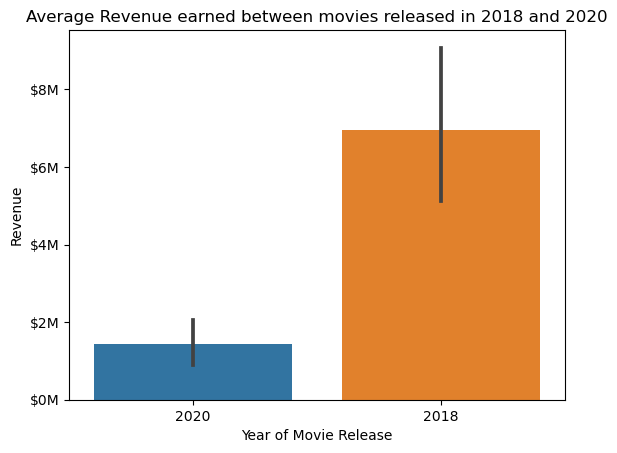

In [50]:
g=sns.barplot(data=df_18_20, y='revenue', x='year')
plt.title('Average Revenue earned between movies released in 2018 and 2020')
plt.ylabel('Revenue')
plt.xlabel('Year of Movie Release')
plt.ticklabel_format(style='plain',axis='y')
ylabels = ['$' + '{:,.0f}'.format(y) + 'M' for y in g.get_yticks()/1000000]
g.set_yticklabels(ylabels)
plt.show()

In [51]:
df_18_20.groupby('year')['revenue'].mean()

year
2018    6.938894e+06
2020    1.434138e+06
Name: revenue, dtype: float64

On average, movies released in:
- 2020 earned $1,434,186
- 2018 earned \$6,938,894

## How do the years compare for movie ratings?

## Do some movie genres earn more revenue than others?

## Are some genres higher rated than others?

In [57]:
df['genres'].value_counts()

[{'id': 18, 'name': 'Drama'}]                                                                                                                             10203
[]                                                                                                                                                         6002
[{'id': 35, 'name': 'Comedy'}]                                                                                                                             4061
[{'id': 27, 'name': 'Horror'}]                                                                                                                             2974
[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}]                                                                                                1842
                                                                                                                                                          ...  
[{'id': 28, 'name': 'Action'}, {'id': 10